## HANDLING MISSING VALUES

In [1]:
import seaborn as sb

In [2]:
sm=sb.load_dataset('titanic')

In [3]:
sm.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
##checking missing value
sm.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
##checking missing value
sm.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
##deleting data point to handele missing value
sm.shape

(891, 15)

In [7]:
sm.dropna().shape

(182, 15)

In [8]:
#column wise deletion
sm.dropna(axis=1)


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## imputation missing values
1- mean value imputation

<Axes: xlabel='age', ylabel='Count'>

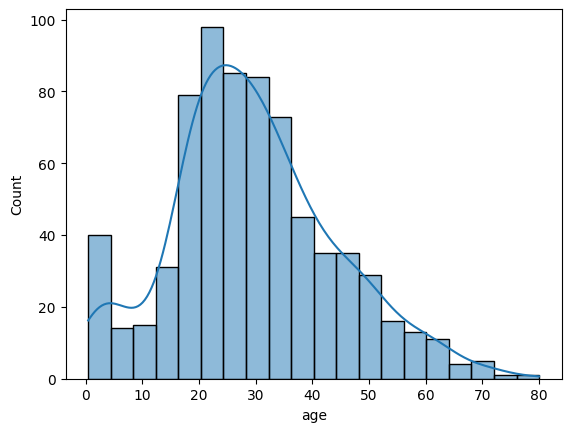

In [9]:
sb.histplot(sm['age'],kde=True)

In [10]:
sm['age_mean']=sm['age'].fillna(sm['age'].mean())

In [11]:
sm[['age_mean','age']] ##mean imputation works well we use normally distributed data 

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2-median  value imputation  

In [12]:
## if we have outliers in dataset

In [13]:
sm['age_median']=sm['age'].fillna(sm['age'].median())

In [14]:
sm[['age_median','age_mean','age']] 

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [15]:
### 3-mode value imputation 

In [16]:
sm[sm['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [17]:
sm['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
sm[sm['embarked'].notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [19]:
mode_value=sm[sm['embarked'].notna()]['embarked'].mode()[0]

In [20]:
sm['embarked_mode']=sm['embarked'].fillna(mode_value)

In [21]:
sm[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [22]:
sm['embarked_mode'].isnull().sum()

0

In [23]:
sm['embarked'].isnull().sum()

2

## handling imbalance dataset
1. up sampling
2. down sampling

In [24]:
import numpy as np
import pandas as pd

In [25]:
np.random.seed()   ##setting the random seed to reproducibility

In [26]:
n_sample=1000    ## creating dataframe with two classes 
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0


In [27]:
n_class_0,n_class_1

(900, 100)

In [28]:
##creating dataframe with imbalance dataset
class_0=pd.DataFrame({
        'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
        'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
        'target':[0]*n_class_0
})
class_1=pd.DataFrame({
        'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
        'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
        'target':[1]*n_class_1
})

In [29]:
sm=pd.concat([class_1,class_0]).reset_index(drop=True)

In [30]:
sm.head()

,feature1,feature2,target
0,-0.150879,1.969041,1
1,-0.289973,0.534751,1
2,3.100118,2.105534,1
3,2.494498,2.943191,1
4,2.161817,2.335224,1


In [31]:
sm.tail()

,feature1,feature2,target
995,0.989414,0.654856,0
996,-0.446419,0.033563,0
997,0.286045,-1.360369,0
998,-0.275743,1.125342,0
999,-0.843059,0.638201,0


In [32]:
sm['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [33]:
## upsampling
sm_minority=sm[sm['target']==1]
sm_majority=sm[sm['target']==0]

In [34]:
from sklearn.utils import resample
sm_minority_upsampled=resample(sm_minority,replace=True,
                     n_samples=len(sm_majority),
                     random_state=42)

In [35]:
sm_minority_upsampled.shape

(900, 3)

In [36]:
sm_minority_upsampled.head()

,feature1,feature2,target
51,2.948086,1.781127,1
92,2.137585,1.230820,1
14,0.876235,1.510228,1
71,3.007142,1.778241,1
60,1.419880,1.693195,1


In [37]:
sm_upsampled=pd.concat([sm_majority,sm_minority_upsampled]).reset_index(drop=True)

In [38]:
sm_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [39]:
## downsampling
sm_minority=sm[sm['target']==1]
sm_majority=sm[sm['target']==0]

In [40]:
from sklearn.utils import resample
sm_majority_downsampled=resample(sm_majority,replace=False,
                     n_samples=len(sm_minority),
                     random_state=42)

In [41]:
sm_majority_downsampled.shape

(100, 3)

In [42]:
sm_majority_downsampled.head()

,feature1,feature2,target
170,0.733623,-0.326945,0
927,-0.569790,-1.055683,0
331,-1.271147,-0.601230,0
688,-0.112640,0.484681,0
139,0.084980,1.003189,0


In [43]:
sm_downsampled=pd.concat([sm_minority,sm_majority_downsampled])

In [44]:
sm_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE

In [45]:
from sklearn.datasets import make_classification

In [46]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                       weights=[0.90],random_state=12)

In [47]:
import pandas as pd

In [48]:
s1=pd.DataFrame(x,columns=['f1','f2'])
s2=pd.DataFrame(y,columns=['target'])
final_s=pd.concat([s1,s2],axis=1)

In [49]:
final_s.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [50]:
final_s['target'].value_counts()


target
0    900
1    100
Name: count, dtype: int64

In [51]:
import matplotlib.pyplot as plt

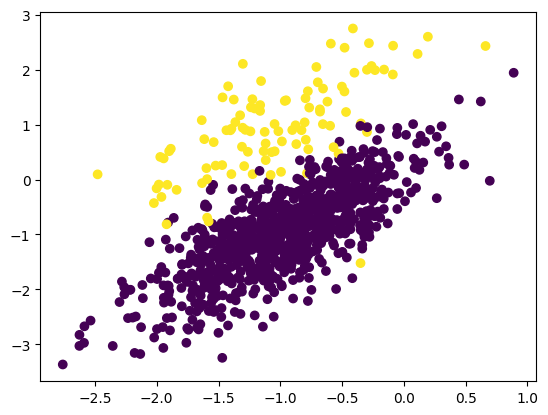

In [52]:
plt.scatter(final_s['f1'],final_s['f2'],c=final_s['target'])

In [53]:
!pip install imblearn

     |████████████████████████████████| 226 kB 20.6 MB/s eta 0:00:01


In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
#transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_s[['f1','f2']],final_s['target'])

In [56]:
x.shape

(1800, 2)

In [57]:
y.shape

(1800,)

In [58]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [59]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [60]:
len(y[y==0])

900

In [61]:
s1=pd.DataFrame(x,columns=['f1','f2'])
s2=pd.DataFrame(y,columns=['target'])
final_s=pd.concat([s1,s2],axis=1)

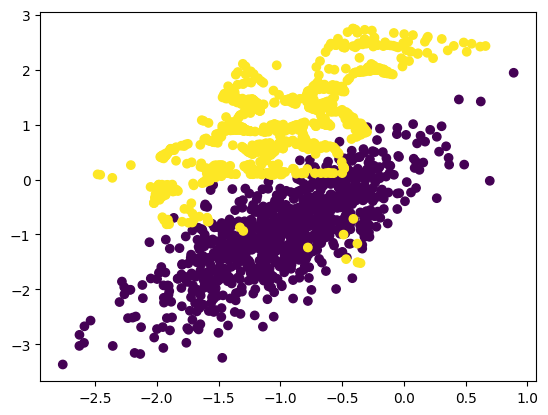

In [62]:
plt.scatter(final_s['f1'],final_s['f2'],c=final_s['target'])

## data interpolation

### linear interpolation

In [63]:
import numpy as np

In [64]:
x=np.array([1,3,5,7,9])
y=np.array([2,4,6,8,10])

In [65]:
import matplotlib.pyplot as plt

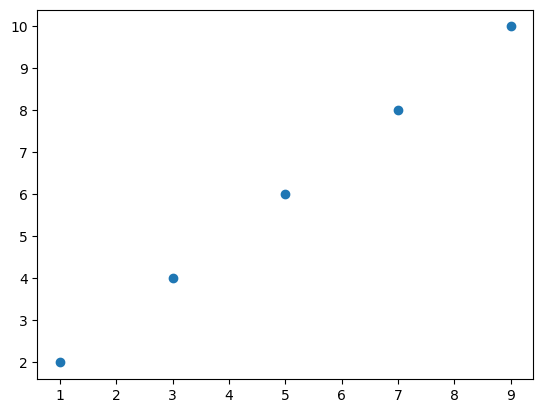

In [66]:
plt.scatter(x,y)

In [67]:
x_new=np.linspace(1,5,10)
y_interp=np.interp(x_new,x,y)

In [68]:
y_interp

array([2.        , 2.44444444, 2.88888889, 3.33333333, 3.77777778,
       4.22222222, 4.66666667, 5.11111111, 5.55555556, 6.        ])

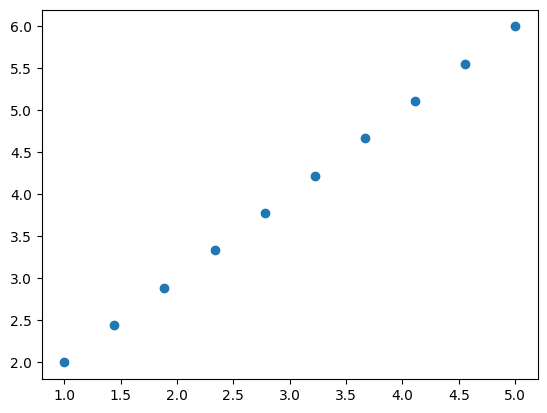

In [69]:
plt.scatter(x_new,y_interp)

## cubic interpolation

In [70]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [71]:
from scipy.interpolate import interp1d

In [72]:
f=interp1d(x,y,kind='cubic')

In [73]:
x_new=np.linspace(1,5,10)
y_interp=f(x_new)

In [74]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

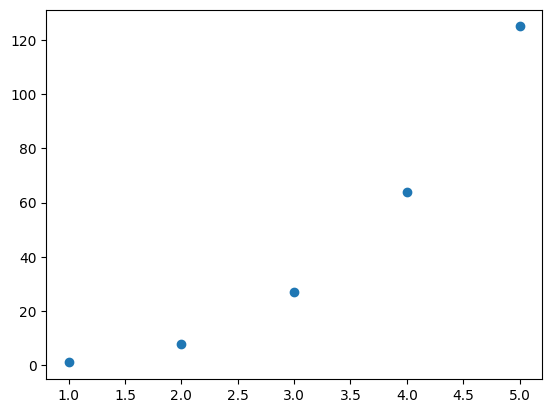

In [75]:
plt.scatter(x,y)

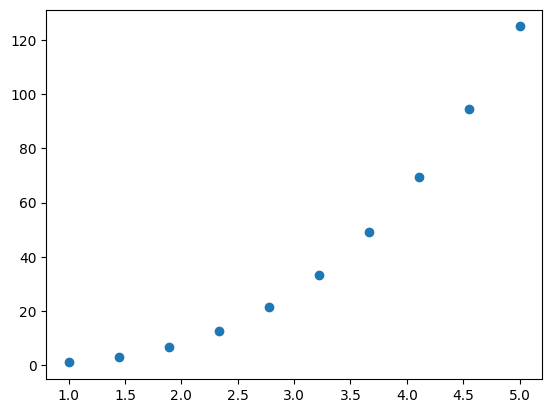

In [76]:
plt.scatter(x_new,y_interp)

### polynomial interpolation

In [77]:
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])

In [78]:
p=np.polyfit(x,y,2)

In [79]:
x_new=np.linspace(1,5,10)
y_interp=np.polyval(p,x_new)

In [80]:
y_interp

array([ 1.        ,  2.08641975,  3.56790123,  5.44444444,  7.71604938,
       10.38271605, 13.44444444, 16.90123457, 20.75308642, 25.        ])

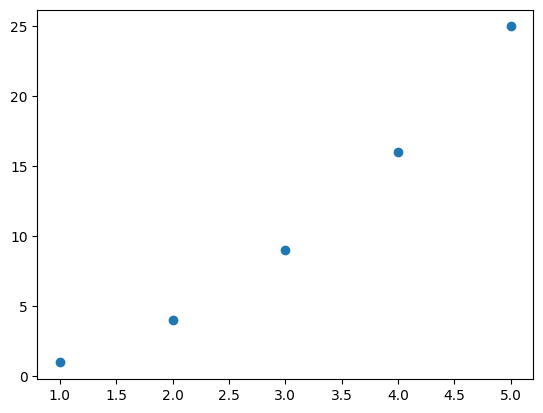

In [81]:
plt.scatter(x,y)

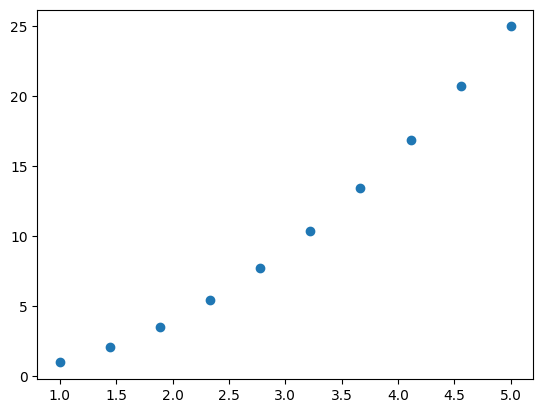

In [82]:
plt.scatter(x_new,y_interp)

## 5 number summary and box plot

In [83]:
## maximum,minimum,median,Q1,Q2,IQR

In [84]:
import numpy as np

In [85]:
lst_marks=[23,24,25,32,37,55,41,69,74,88,97,76,65,91,53,49]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,.25,.5,.75,1])

In [86]:
minimum,Q1,median,Q3,maximum

(23.0, 35.75, 54.0, 74.5, 97.0)

In [87]:
IQR=Q3-Q1

In [88]:
print(IQR)

38.75


In [89]:
lower_fence=Q1-1.5*(IQR)

In [90]:
higher_fence=Q3+1.5*(IQR)

In [91]:
lower_fence

-22.375

In [92]:
higher_fence

132.625

In [93]:
lst_marks=[23,24,25,32,37,55,41,69,74,88,97,76,65,91,53,49]

In [94]:
import seaborn as sb

<Axes: >

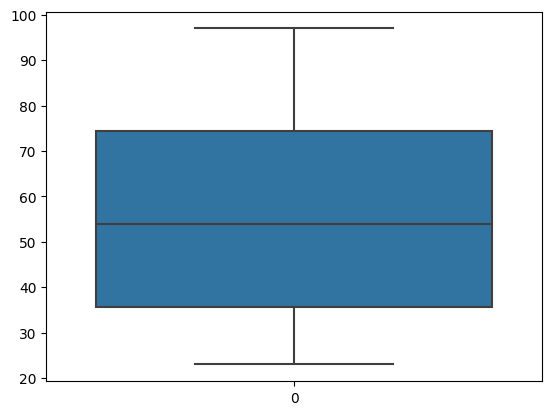

In [95]:
sb.boxplot(lst_marks)

In [96]:
lst_marks1=[23,24,25,32,37,55,41,69,74,88,97,76,65,91,53,49,150,200]

<Axes: >

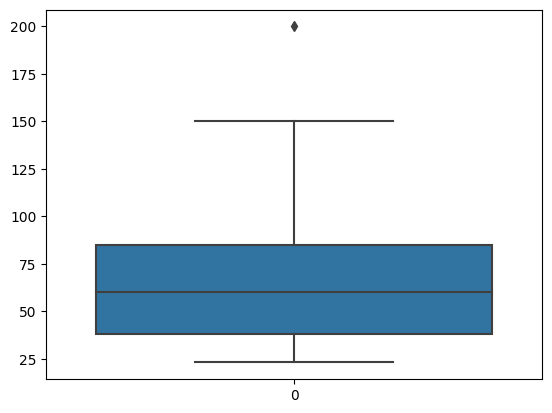

In [97]:
sb.boxplot(lst_marks1)

In [98]:
lst_marks2=[-44,-69,23,24,25,32,37,55,41,69,74,88,97,76,65,91,53,49,150,188]

<Axes: >

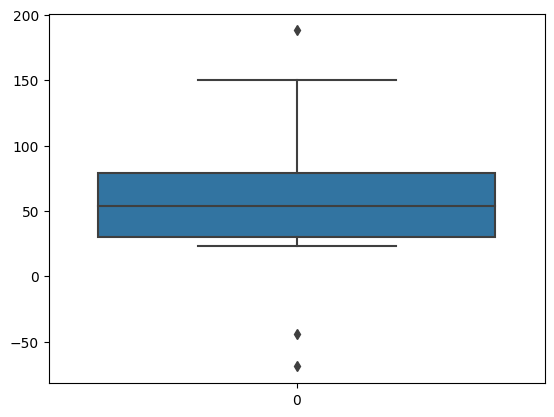

In [99]:
sb.boxplot(lst_marks2)